In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/CVPR/Mid_A2/Data.csv")
df.head()
df.head(df.shape[0])

Mounted at /content/drive


,X,Y,LABEL
0,95,-82,3
1,-80,86,2
2,66,48,3
3,-74,-28,0
4,24,-99,4
...,...,...,...
495,5,8,4
496,-74,32,1
497,53,73,3
498,-35,59,2


In [3]:
def normalize(input):
  if input == 0:
    return [1,0,0,0,0]
  elif input == 1:
    return [0,1,0,0,0]
  elif input == 2:
    return [0,0,1,0,0]
  elif input == 3:
    return [0,0,0,1,0]
  elif input == 4:
    return [0,0,0,0,1]

In [4]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

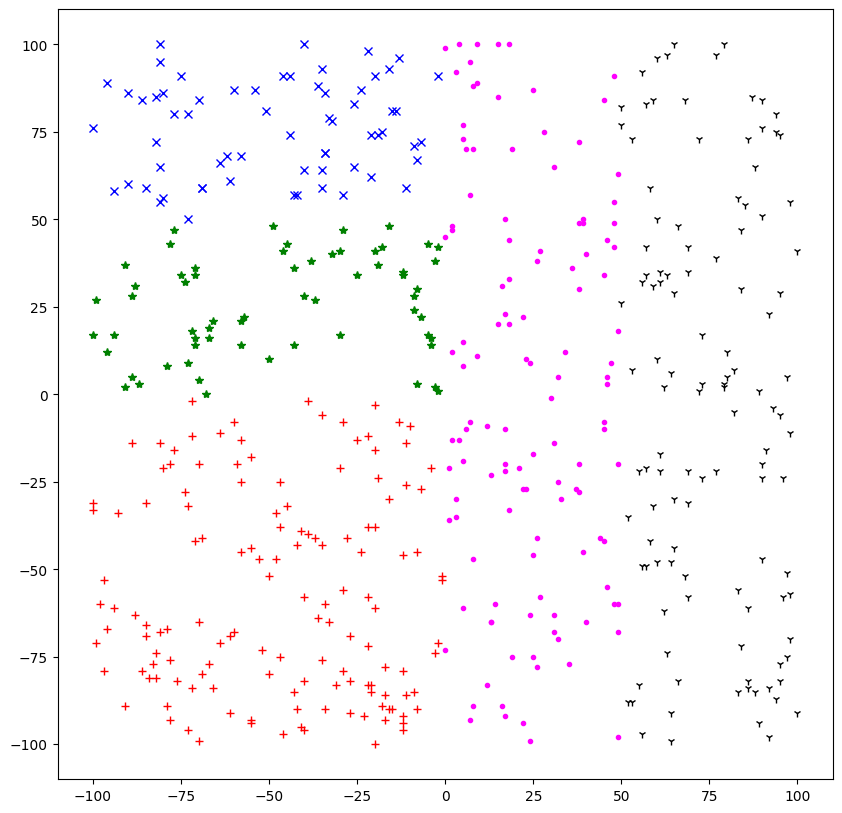

In [5]:
plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red", marker="+")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="green", marker="*")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue", marker="x")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="black", marker="1")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="magenta", marker=".")
plt.show()

In [6]:
features = list(zip(X1, X2))

features_np = np.array(features)

In [7]:
Y2 = np.array([normalize(i) for i in Y])

In [8]:
features_train = features_np[:400]
Y2_train = Y2[:400]

features_test = features_np[400:]
Y2_test = Y2[400:]

In [26]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 20, hidden2LayerNeurons = 20, hidden3LayerNeurons = 20, outLayerNeurons = 5, learning_rate = 0.01, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias initialization
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2 # return x * (1-x)
            else:
                return 1 / (1 + np.exp(-x)) # 1 / (1 + e^-x)

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2 # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2)) # -2xe^(-x^2)
            else:
                return np.exp(-x**2)  # e^(-x^2)

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

Epoch: 0, error: 0.1607692877256686
Epoch: 10000, error: 0.06315452570000202
Epoch: 20000, error: 0.062460249207157474
Epoch: 30000, error: 0.06393799534076507
Epoch: 40000, error: 0.06081623739050748
Epoch: 50000, error: 0.061196300652622264
Epoch: 60000, error: 0.056899602242748
Epoch: 70000, error: 0.06169094313558966
Epoch: 80000, error: 0.06044279812096456
Epoch: 90000, error: 0.059040689340329675


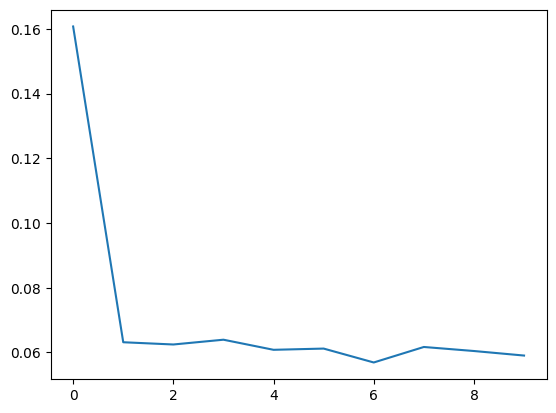

In [29]:
NN = NeuralNetwork(activation_type = 'sigmoid')
#NN = NeuralNetwork(activation_type ='tanh')
#NN = NeuralNetwork(activation_type = 'gaussian')
#NN = NeuralNetwork(activation_type = 'relu')

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [30]:
def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [31]:
def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [35]:
pred = NN.feedForward([80,-30])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[1.61022494e-13 3.18006640e-11 9.62241529e-22 6.67926086e-01
 4.24984507e-01]
{'Class-0': 1.610224942713378e-11, 'Class-1': 3.1800664042220132e-09, 'Class-2': 9.622415286684857e-20, 'Class-3': 66.79260858117, 'Class-4': 42.49845071779744}
Class-3
